# Download Data

**Reference Paper** for this project is [here](https://arxiv.org/pdf/1701.05927.pdf.
<br>
**Data** is available [here](https://zenodo.org/record/269622#.Xkq0-jIzapq).

In [0]:
! wget https://zenodo.org/record/269622/files/jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5

--2020-02-17 14:44:24--  https://zenodo.org/record/269622/files/jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2220068544 (2.1G) [application/octet-stream]
Saving to: ‘jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5’

jet-images_Mass60-1 100%[===================>]   2.07G  9.18MB/s    in 5m 4s   

2020-02-17 14:49:30 (6.96 MB/s) - ‘jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5’ saved [2220068544/2220068544]



# Load Data and Libraries


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [0]:
filename = 'jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5'

images = 0
df = {}

with h5py.File(name=filename, mode="r") as f:
    for key in f.keys():
      if key != "image":
          df[key] = np.array(f[key])
      else:
          images = np.array(f[key])
f.close()
del f

Attribute of the dataset are as follow:
* **image** : array of dim (872666, 25, 25), contains the pixel intensities of each 25x25 image
* **signal** : binary array to identify signal (1, i.e. W boson) vs background (0, i.e. QCD)
* **jet_eta**: eta coordinate per jet
* **jet_phi**: phi coordinate per jet
* **jet_mass**: mass per jet
* **jet_pt**: transverse momentum per jet
* **jet_delta_R**: distance between leading and subleading subjets if 2 subjets present, else 0
* **tau_1, tau_2, tau_3**: substructure variables per jet (a.k.a. n-subjettiness, where n=1, 2, 3)
* **tau_21**: tau2/tau1 per jet
* **tau_32**: tau3/tau2 per jet

Information is taken from [here](https://zenodo.org/record/269622#.Xkq0-jIzapq).

# Data Distribution

In [4]:
# List of Keys of Dataset

list(df.keys())

['jet_delta_R',
 'jet_eta',
 'jet_mass',
 'jet_phi',
 'jet_pt',
 'signal',
 'tau_1',
 'tau_2',
 'tau_21',
 'tau_3',
 'tau_32']

In [13]:
df["tau_1"].shape

(872666,)

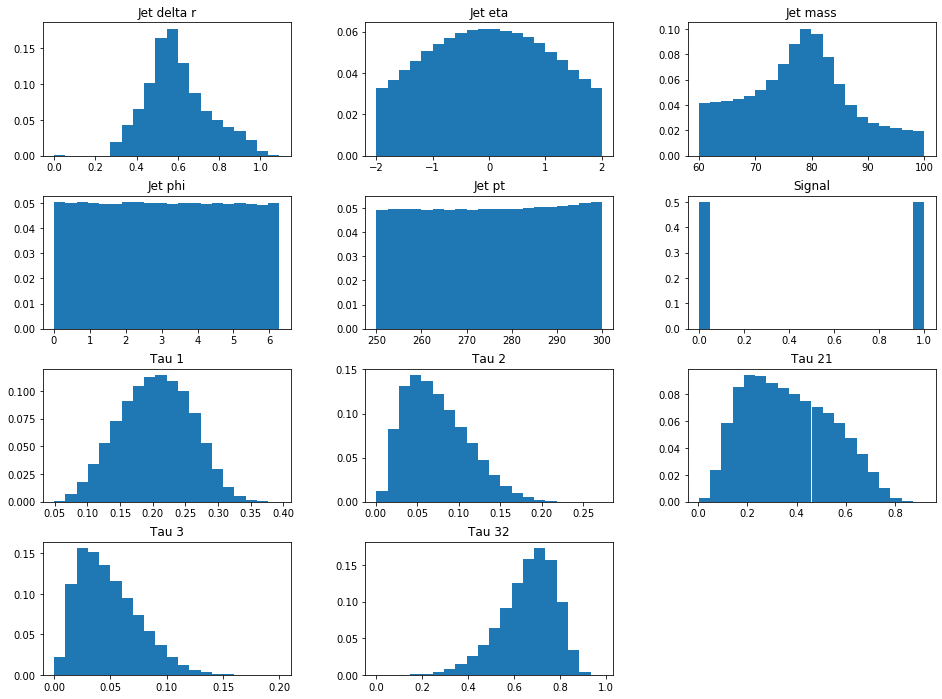

In [14]:
plt.rcParams["figure.figsize"] = 16, 12
plt.subplots_adjust(wspace=0.3, hspace=0.3)
weights = np.ones_like(df["tau_1"])/float(len(df["tau_1"]))

for idx, key in enumerate(df.keys()):
    plt.subplot(4, 3, idx+1)
    plt.hist(df[key], weights=weights, bins=20)
    plt.title(key.replace("_", " ").capitalize())
plt.show()